# Libraries

In [94]:
# data 
import pandas as pd
import numpy as np
import itertools

# visualization
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing

# algorythms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn import svm

# Functions

In [95]:
# Function to visualize confusion matrix

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

# Data and cleaning

In [96]:
# Cleaning df
df_clean = pd.read_csv('GG_df_clean.csv')
df_clean = df_clean.dropna()
df_clean = df_clean.drop(['first_name', 'Last_Name', 'Unnamed: 0'], axis=1)
df_clean = df_clean.iloc[:2596]

In [109]:
df_clean.head()

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,playerid,G,GS,PO,A,E,DP,DPS,FP,Target
16,2013,Leonys Martin,TEX,CF,974.1,-1.0,14.0,230.0,211.0,76.0,...,11846.0,127.0,109.0,287.0,11.0,5.0,0.0,1.0,0.984,0.0
23,2009,Franklin Gutierrez,SEA,CF,1353.1,4.0,33.0,345.0,333.0,113.0,...,3255.0,153.0,152.0,445.0,6.0,7.0,0.0,2.0,0.985,0.0
28,2006,Adam Everett,HOU,SS,1292.1,0.0,34.0,396.0,353.0,60.0,...,1430.0,149.0,146.0,202.0,479.0,7.0,102.0,43.0,0.990,0.0
34,2007,Omar Vizquel,SFG,SS,1219.1,0.0,16.0,395.0,350.0,47.0,...,411.0,143.0,136.0,198.0,444.0,9.0,85.0,47.0,0.986,0.0
37,2014,Leonys Martin,TEX,CF,1247.1,3.0,16.0,336.0,306.0,109.0,...,11846.0,152.0,140.0,415.0,11.0,8.0,0.0,3.0,0.982,0.0


In [110]:
# Subsetting target variable (Gold Glove Awards)
target = df_clean['Target']

# Preparing features
features = df_clean.drop(['Season', 'Name', 'Team', 'playerid', 'Target'], axis = 1, inplace = False)

# Get dummies for categorical values
features = pd.get_dummies(features)

features.head()

,Inn,rGFP,DRS,BIZ,Plays,OOZ,RngR,ErrR,UZR,UZR/150,...,DP,DPS,FP,Pos_1B,Pos_2B,Pos_3B,Pos_CF,Pos_LF,Pos_RF,Pos_SS
16,974.1,-1.0,14.0,230.0,211.0,76.0,4.1,-0.3,10.6,13.7,...,0.0,1.0,0.984,0,0,0,1,0,0,0
23,1353.1,4.0,33.0,345.0,333.0,113.0,32.2,-2.1,31.0,29.0,...,0.0,2.0,0.985,0,0,0,1,0,0,0
28,1292.1,0.0,34.0,396.0,353.0,60.0,16.6,7.5,25.1,25.7,...,102.0,43.0,0.990,0,0,0,0,0,0,1
34,1219.1,0.0,16.0,395.0,350.0,47.0,15.6,7.5,23.9,24.0,...,85.0,47.0,0.986,0,0,0,0,0,0,1
37,1247.1,3.0,16.0,336.0,306.0,109.0,1.1,-1.5,11.5,10.1,...,0.0,3.0,0.982,0,0,0,1,0,0,0


In [111]:
# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_data, columns = features.columns)
features = scaled_df

scaled_df.head()

/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Inn,rGFP,DRS,BIZ,Plays,OOZ,RngR,ErrR,UZR,UZR/150,...,DP,DPS,FP,Pos_1B,Pos_2B,Pos_3B,Pos_CF,Pos_LF,Pos_RF,Pos_SS
0,-0.989492,-0.629983,1.314439,-0.178192,0.131470,1.077906,0.559456,-0.346370,1.230031,1.380237,...,-1.018081,-0.981737,0.184847,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048
1,1.101330,2.050107,3.263244,0.939635,1.595394,2.499125,4.665688,-1.079972,3.824951,3.041748,...,-1.018081,-0.920379,0.258291,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048
2,0.764812,-0.093965,3.365813,1.435367,1.835381,0.463324,2.386072,2.832571,3.074459,2.683383,...,1.382128,1.595323,0.625512,-0.421222,-0.41695,-0.418375,-0.411226,-0.336045,-0.387971,2.168971
3,0.362095,-0.093965,1.519576,1.425647,1.799383,-0.036023,2.239942,2.832571,2.921817,2.498771,...,0.982093,1.840757,0.331735,-0.421222,-0.41695,-0.418375,-0.411226,-0.336045,-0.387971,2.168971
4,0.516562,1.514089,1.519576,0.852153,1.271411,2.345480,0.121068,-0.835438,1.344513,0.989293,...,-1.018081,-0.859020,0.037959,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048


In [112]:
# Testing/Trainging data split for model 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [113]:
# baseline model
rf = RandomForestClassifier(random_state = 123)

# train
rf = rf.fit(X_train, y_train)

# predict
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# evaluate
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_test_precision = precision_score(y_test, rf_test_preds)
rf_test_F1 = f1_score(y_test, rf_test_preds)
rf_report = classification_report(y_test, rf_test_preds)

# store accuracy in a new dataframe
score_rf = ['Random Forest', rf_train_accuracy, rf_test_accuracy, rf_test_precision, rf_test_F1]
models1 = pd.DataFrame([score_rf])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
print('Classification Report Random Forest: \n', rf_report)
print('------------------------------------------------------')
print('')
print('Random Forest')
print('------------------------------------------------------')
print(f"Training Accuracy: {(rf_train_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(rf_test_accuracy * 100):.4}%")

Classification Report Random Forest: 
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       512
         1.0       0.42      0.15      0.22        67

   micro avg       0.88      0.88      0.88       579
   macro avg       0.66      0.56      0.58       579
weighted avg       0.84      0.88      0.85       579

------------------------------------------------------

Random Forest
------------------------------------------------------
Training Accuracy: 98.5%
Test Accuracy:     87.74%


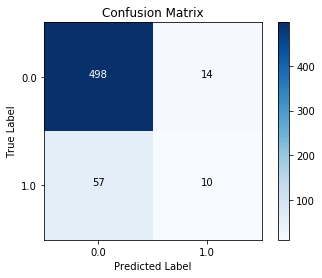

In [115]:
show_cf(y_test, rf_test_preds)

# PCA

In [116]:
# Run the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

In [117]:
# Run the classifer on PCA'd data
X = principalComponents
y = target
y = preprocessing.LabelEncoder().fit_transform(y)

# split PCA data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size=0.2, random_state=9)

# model
PCA_rf = RandomForestClassifier(random_state = 123)

# train
PCA_rf.fit(X_train2, Y_train2)

# predict
PCA_rf_train_preds = PCA_rf.predict(X_train2)
PCA_rf_test_preds = PCA_rf.predict(X_test2)

# evaluate
PCA_rf_train_accuracy = accuracy_score(Y_train2, PCA_rf_train_preds)
PCA_rf_test_accuracy = accuracy_score(Y_test2, PCA_rf_test_preds)
PCA_rf_test_precision = precision_score(Y_test2, PCA_rf_test_preds)
PCA_rf_test_F1 = f1_score(Y_test2, PCA_rf_test_preds)
PCA_rf_report = classification_report(Y_test2, PCA_rf_test_preds)

# store accuracy in a new dataframe
score_PCA_rf = ['PCA Random Forest', PCA_rf_train_accuracy, PCA_rf_test_accuracy, PCA_rf_test_precision, PCA_rf_test_F1]
models1 = models1.append([score_PCA_rf])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [118]:
print('Classification Report PCA Random Forest: \n', PCA_rf_report)
print('------------------------------------------------------')
print('')
print('PCA Random Forest')
print('------------------------------------------------------')
print(f"Training Accuracy: {(PCA_rf_train_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(PCA_rf_test_accuracy * 100):.4}%")

Classification Report PCA Random Forest: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       421
           1       0.30      0.07      0.11        43

   micro avg       0.90      0.90      0.90       464
   macro avg       0.61      0.53      0.53       464
weighted avg       0.86      0.90      0.87       464

------------------------------------------------------

PCA Random Forest
------------------------------------------------------
Training Accuracy: 98.06%
Test Accuracy:     89.87%


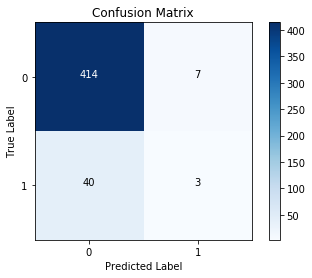

In [119]:
show_cf(Y_test2, PCA_rf_test_preds)

In [122]:
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test F1']
models1.columns = columns
models1

,Model,Train Accuracy,Test Accuracy,Test Precision,Test F1
0,Random Forest,0.985032,0.877375,0.416667,0.219780
0,PCA Random Forest,0.980562,0.898707,0.300000,0.113208
